# Assignment 1 - kNN - Curso de Ciência de Dados

_Feito por: [Dora](https://github.com/joaopedromattos)_

Seja muito bem-vindo ao seu primeiro dever de casa de Ciência de Dados.

Neste _notebook_ você aprenderá a dar seus primeiros passos dentro do _pipeline_ de um projeto de Ciência de Dados!

Conteúdos abordados nessa lição:
- Sintaxe Python;
- Numpy, Jupyter e Matplotlib;
- Coleta do *dataset*;
- Pré-processamento;
- Construção do modelo;
- *Fine-tunning*;


In [3]:
# Tomamos a liberdade de importar para você tudo aquilo que voce usara no seu trabalho! 
# Lembre-se de ter tudo instalado!
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from kNN import KNearestNeighbor

# Essas linhas sao apenas configuracoes de plotting. Elas nao sao importantes para o seu aprendizado,
# entao as trataremos como "magica" por agora, ok?
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Abaixo encontram-se os hiperparametros do modelo que sera construido.
# A nao ser que seja instruido, voce nao deve modifica-los
TRAIN_TEST_SPLIT_SIZE = 0.2 # Define que o TESTE correspondera a 20% do total do dataset
K = 1 # Define o numero de vizinhos a partir dos quais realizaremos a votacao do kNN

## Primeiros passos: Carregando o dataset

Ao executar a célula abaixo, você carregará o *mnist*, o *dataset* utilizado nessa lição.

O dataset possui 1797  imagens.


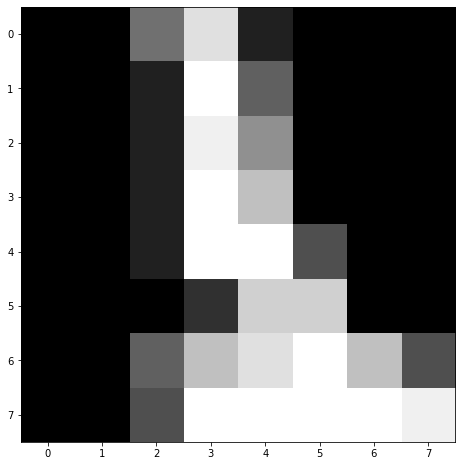

In [4]:
dataset = datasets.load_digits()

datasetSize = len(dataset.images)
print("O dataset possui", datasetSize, " imagens.")

# Mostraremos uma imagem aleatoria dentro do dataset
plt.imshow(dataset.images[np.random.randint(datasetSize)])

Como mencionado em aula, dentro do aprendizado supervisionado, precisamos realizar uma divisão dos dados entre dois conjuntos distintos, os quais serão chamados de **treino** e **teste**.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=TRAIN_TEST_SPLIT_SIZE)

print("Train shapes - X =", X_train.shape," y =", y_train.shape)
print("Test shapes - X =", X_test.shape," y =", y_test.shape)

Train shapes - X = (1437, 64)  y = (1437,)
Test shapes - X = (360, 64)  y = (360,)


In [6]:
# Inicializando o classificador kNN e alimentando com os dados do treino...
kNN = KNearestNeighbor()
kNN.train(X_train, y_train)

Train format:  (1437, 64)
Train format:  (1437,)


## Implementando o kNN
Agora que possuímos nossos dados, podemos implementar nosso modelo, o kNN(K-Nearest Neighbor).

Neste dever de casa, propomos 3 implementações diferentes do mesmo modelo, sendo a última um desafio!

Vamos por partes! Começemos pela versão mais simples (e ineficiente) do kNN. Acesse o arquivo ```kNN.py``` e vá até o método ```compute_distances_two_loops```. Nela, você deve calcular o kNN com dois loops aninhados, um que itera por todos os dados do conjunto de teste e outro que itera no conjunto de treino. Quando terminar, volte aqui e execute a célula abaixo. Boa sorte!


In [7]:
dists = kNN.compute_distances_two_loops(X_test)
print(dists.shape)

(360, 1437)


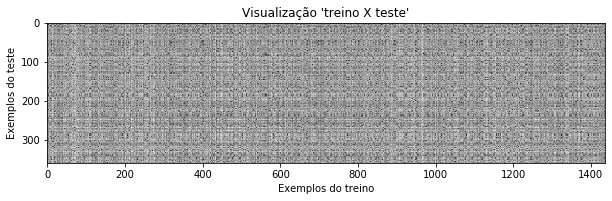

In [8]:
plt.imshow(dists, interpolation='none')
plt.ylabel("Exemplos do teste")
plt.xlabel("Exemplos do treino")
plt.title("Visualização 'treino X teste'")
plt.show()

Na imagem acima, quanto mais escura um ponto, menor é o valor da distância. A partir disso, tente refletir por algum tempo sobre o que significaria caso houvesse uma linha completamente branca ou uma coluna completamente branca no gráfico.

## Precisão da classificação

Agora que já computamos as distâncias, você precisa finalizar o processo de classficação através da inferência de cada um dos itens do teste. Vá até a função ```predict_labels``` no ```kNN.py``` e implemente o processo de classficação do kNN como visto em sala de aula. Confira o material disponibilizado ou entre em contato com os ministrantes caso ainda restem dúvidas! Boa sorte!

In [12]:
y_test_pred = kNN.predict_labels(dists, k=3)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Precisão %d / %d => %f' % (num_correct, len(y_test), accuracy))

Precisão 0 / 360 => 0.000000


/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Antes de finalizar o *homework*, experimente diversos valores para o hiperparâmetro "k".

Excelente! Você chegou ao fim do homework! Esperamos que você tenha aprendido muito com este dever de casa!
Em caso de dúvidas, fique à vontade para falar com o ministrante da aula, João Pedro R. Mattos através do email (joao_pedro_mattos@hotmail.com) ou do Telegram (@joaopedromattos).